# Classificação de textos com spaCy

## 1: Importação e instalação das bibliotecas

In [ ]:
#instalando ou fazendo o upgrade da lib
#!pip install spacy --upgrade

#para escolher a versão
!pip install spacy==2.2.3

     |████████████████████████████████| 10.4MB 4.0MB/s 
     |████████████████████████████████| 2.2MB 44.8MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
#verificando a versão instalada
import spacy
spacy.__version__

'2.2.3'

In [ ]:
#import das lib
import pandas as pd
#para pré processamento
import string
import spacy
#gerar números aleatórios
import random
import seaborn as sns
import numpy as np

**Como é o processo de classificação**

Vamos utilizar 100% do uso de processar do texto utilizando o spaCy e depois iremos criar o nosso algoritimo de classificação utilizando o spaCy.

O spaCy utiliza Rede neural convolucional para fazer a classificação. 

Iremos aplicar um estudo de caso em classificar o texto em Alegria e Medo.

## 2: Carregamento da base de dados

###Estudo de Caso: Cria um modelo para saber o sentimento.

- processar o texto 
- treinar o modelo
- prevê

In [ ]:
#o corpus foi de uma base de dados aberta, não foi feita a validação quanto ao sentimentos no texto.
base_dados = pd.read_csv('/content/drive/MyDrive/Curso_Twitter/Notbook/Datasets/base_treinamento.txt', encoding = 'utf-8')

In [ ]:
# verificar o tamanho
base_dados.shape

(196, 2)

In [ ]:
#vê a base
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [ ]:
#vê a base
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


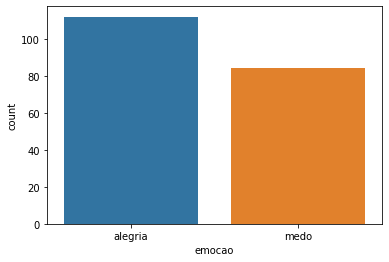

In [ ]:
#vamos verificar a base utilizando o seaborn
sns.countplot(base_dados['emocao'], label = 'Contagem');
#podemos vê o desbalancemanto

## 3: Função para pré-processamento dos textos

###Carregando o modelo do spaCy

In [ ]:
#carregando os pacotes em PT
!python -m spacy download pt

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
#carregar o modelo treinado
import spacy
pln = spacy.load('pt')
pln

###Texto em caixa alta ou baixa

In [ ]:
#lower
documento= 'eu sou o HELIO'
documento= documento.lower()
print(documento)

eu sou o helio


In [ ]:
#upper
documento= 'eu sou o HELIO'
documento= documento.upper()
print(documento)

EU SOU O HELIO


###Retirar pontuação

In [ ]:
#chamando as pontuações
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

###Retirar Stopwords

In [ ]:
#impot das stopwords e verificar o total
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS
print(stop_words)
print(len(STOP_WORDS))

{'obrigada', 'local', 'usar', 'segunda', 'apoio', 'nunca', 'minha', 'cada', 'partir', 'todas', 'mais', 'irá', 'outros', 'vão', 'cinco', 'fazem', 'dez', 'tão', 'questão', 'talvez', 'sexto', 'vosso', 'sistema', 'dessa', 'teus', 'dentro', 'apoia', 'parte', 'sua', 'nada', 'com', 'logo', 'perto', 'sexta', 'breve', 'final', 'sobre', 'nós', 'fez', 'tente', 'fará', 'tivemos', 'três', 'como', 'aquele', 'era', 'comprido', 'essa', 'isso', 'pontos', 'valor', 'porque', 'nossas', 'aos', 'área', 'das', 'momento', 'pelas', 'doze', 'sabe', 'essas', 'possível', 'portanto', 'aqui', 'minhas', 'vais', 'forma', 'foste', 'inicio', 'inclusive', 'novos', 'na', 'meio', 'de', 'para', 'longe', 'pouco', 'for', 'bom', 'pois', 'às', 'ser', 'no', 'acerca', 'à', 'todos', 'quinto', 'uns', 'tempo', 'ou', 'veja', 'comprida', 'foram', 'próxima', 'nesta', 'tens', 'dão', 'diante', 'até', 'porém', 'nessa', 'lhe', 'conhecida', 'fostes', 'da', 'pela', 'estado', 'atrás', 'grande', 'exemplo', 'nossa', 'assim', 'suas', 'tentaram'

###Tokenizar

In [ ]:
#criar uma lista e tokenizar o texto

lista=[]

texto='exemplo de texto para você aprender'

documento = pln(texto)

for token in documento:
  lista.append(token.text)

print(lista)


['exemplo', 'de', 'texto', 'para', 'você', 'aprender']


###Lematizar

In [ ]:
#criar uma lista e tokenizar o texto
#exemplo 1

lista=[]

texto='eu estou aprendendo a lematizar os valores de processamento de linguagem natural'

documento = pln(texto)

for token in documento:
  lista.append(token.lemma_)

print(lista)

['eu', 'estar', 'aprender', 'o', 'lematizar', 'o', 'valorar', 'de', 'processamento', 'de', 'linguagem', 'natural']


In [ ]:
#criar uma lista e tokenizar o texto
#exemplo 2

lista=[]

texto='eu Estou Aprendendo a lematizar os valores de processamento de linguagem natural'

documento = pln(texto)

for token in documento:
  lista.append(token.lemma_)

print(lista)

['eu', 'Estou', 'Aprendendo', 'o', 'lematizar', 'o', 'valorar', 'de', 'processamento', 'de', 'linguagem', 'natural']


obs: Verifique que nos dois exemplo ele trata a palavra com caixa alta de forma diferente.

###Criando uma função de pré-processamento

In [ ]:
#passo 1
def processamento1(texto):
  texto = texto.lower()
  documento=pln(texto)
  lista=[]
  for token in documento:
    #testando se funciona a função
    #lista.append(token.text)
    lista.append(token.lemma_)
  return lista

In [ ]:
teste = processamento1('eu vou passear pensando na vida porque não sei o que fazer 231')

teste

['eu',
 'ir',
 'passear',
 'pensar',
 'o',
 'vidar',
 'porque',
 'não',
 'saber',
 'o',
 'que',
 'fazer',
 '231']

In [ ]:
#verificando as stop e pontuação
print(stop_words)
print(pontuacoes)

{'obrigada', 'local', 'usar', 'segunda', 'apoio', 'nunca', 'minha', 'cada', 'partir', 'todas', 'mais', 'irá', 'outros', 'vão', 'cinco', 'fazem', 'dez', 'tão', 'questão', 'talvez', 'sexto', 'vosso', 'sistema', 'dessa', 'teus', 'dentro', 'apoia', 'parte', 'sua', 'nada', 'com', 'logo', 'perto', 'sexta', 'breve', 'final', 'sobre', 'nós', 'fez', 'tente', 'fará', 'tivemos', 'três', 'como', 'aquele', 'era', 'comprido', 'essa', 'isso', 'pontos', 'valor', 'porque', 'nossas', 'aos', 'área', 'das', 'momento', 'pelas', 'doze', 'sabe', 'essas', 'possível', 'portanto', 'aqui', 'minhas', 'vais', 'forma', 'foste', 'inicio', 'inclusive', 'novos', 'na', 'meio', 'de', 'para', 'longe', 'pouco', 'for', 'bom', 'pois', 'às', 'ser', 'no', 'acerca', 'à', 'todos', 'quinto', 'uns', 'tempo', 'ou', 'veja', 'comprida', 'foram', 'próxima', 'nesta', 'tens', 'dão', 'diante', 'até', 'porém', 'nessa', 'lhe', 'conhecida', 'fostes', 'da', 'pela', 'estado', 'atrás', 'grande', 'exemplo', 'nossa', 'assim', 'suas', 'tentaram'

In [ ]:
#passo 2 melhorando o código
def preprocessamento2(texto):
  texto = texto.lower()
  documento = pln(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]

  return lista

In [ ]:
teste = preprocessamento2('?eu vou passear, pensando na vida porque não sei o que fazer 231!')

teste

['passear', 'pensar', 'o', 'vidar', 'o', '231']

In [ ]:
#passo 3 melhorando o código
def preprocessamento3(texto):
  texto = texto.lower()
  documento = pln(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
teste = preprocessamento3('?eu vou passear, pensando na vida porque não sei o que fazer 231!')

teste

'passear pensar o vidar o'

## 4: Pré-processamento da base de dados

In [ ]:
#verificando a nossa base de dados
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [ ]:
#exemplo
base_exemplo = base_dados

#aplicando a função de processamento
base_exemplo['texto_tratada'] = base_exemplo['texto'].apply(preprocessamento3)
base_exemplo.head(10)

,texto,emocao,texto_tratada
0,este trabalho é agradável,alegria,trabalhar agradável
1,gosto de ficar no seu aconchego,alegria,gostar ficar o aconchegar
2,fiz a adesão ao curso hoje,alegria,o adesão o o cursar hoje
3,eu sou admirada por muitos,alegria,admirar
4,adoro como você,alegria,adorar comer
5,adoro seu cabelo macio,alegria,adorar cabelar maciar
6,adoro a cor dos seus olhos,alegria,adorar o cor olho
7,somo tão amáveis um com o outro,alegria,somar amável o outro
8,sinto uma grande afeição por ele,alegria,sentir umar afeição
9,quero agradar meus filhos,alegria,querer agradar filho


In [ ]:
#aplicando a função de processamento
base_dados['texto'] = base_dados['texto'].apply(preprocessamento3)
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


## 5: Tratamento da Classe

In [ ]:
#para o modelo entender os dados devem estar no seguinte formato
exemplo_base_dados = [["este trabalho é agradável", {"ALEGRIA": True, "MEDO": False}],
                      ["este lugar continua assustador", {"ALEGRIA": False, "MEDO": True}]]

In [ ]:
#tipo do dado
type(exemplo_base_dados)

list

In [ ]:
#verificando os dados na linha 0
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
#posição 0 e linha 0
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [ ]:
#na posiçâo 1 e linha 0
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
#a classificação é que tipo?
type(exemplo_base_dados[0][1])

dict

###Tratando o sentimento

In [ ]:
#temos que correr o texto e pegar a emoção
#parte 1
base_dados_final = []
for texto, emocao in base_dados['texto'], base_dados['emocao']:
  print(texto, emocao)

ValueError: ignored

In [ ]:
#temos que correr o texto e pegar a emoção
#temos muitos valores para jogar nas variaveis dai utilizamos o zip
#parte 2
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  print(texto, emocao)

trabalhar agradável alegria
gostar ficar o aconchegar alegria
o adesão o o cursar hoje alegria
admirar alegria
adorar comer alegria
adorar cabelar maciar alegria
adorar o cor olho alegria
somar amável o outro alegria
sentir umar afeição alegria
querer agradar filho alegria
sentir completamente amar alegria
amar alegria
alívio alegria
o dor amenizar finalmente alegria
achar apaixonar alegria
amar maravilhoso alegria
sentir animar alegria
sentir hoje alegria
comer o luar belo alegria
o dia bonito alegria
comer afortunar alegria
o maravilhar mundo alegria
receber caro hoje colega alegria
sentir reconfortar hoje alegria
o amigo alegria
contentar o resultar teste alegria
pintura brilhante alegria
água abundância alegria
roupar delicado alegria
comediante alegria
bondade o suar alegria
o amor lindar alegria
amizade durar parir alegria
eufórico o notícia alegria
realmente fiel o mim alegria
umar festa parir comemorar aniversário alegria
graça o deus enxergar o certar alegria
o melhor escolher

In [ ]:
#temos que correr o texto e pegar a emoção
#temos muitos valores para jogar nas variaveis dai utilizamos o zip
#parte 3
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

#copy() é pq ele vai fazer uma cópia do dicionário, se não ele colocaria o endereço de memória

In [ ]:
#verificando se esta correto
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [ ]:
#verificando se esta correto
base_dados_final[0][0]

'trabalhar agradável'

In [ ]:
#verificando se esta correto
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [ ]:
#verificando se esta correto
type(base_dados_final[0][1])

dict

In [ ]:
#verificando toda a base final
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

## 6: Criar o classificador

importante lembrar que estamos trazendo ele do próprio spaCy. Uma Rede Neural Convolutional.

In [ ]:
#inicalizar o modelo em branco em portugues
#a rede neural está na variável modelo
modelo=spacy.blank('pt')

#temos que informar as categorias
categorias= modelo.create_pipe('textcat')
#'textcat' é importante está assim.

#adicioando os label de classificação
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")

#adicionando os label no modelo 
modelo.add_pipe(categorias)

In [ ]:
#lista para auxiliar na avaliação do modelo, vê o erro
historico=[]

###Treinamento

In [ ]:
#iniciar o treinamento
modelo.begin_training()

#como estamos tratando com redes neurais, devemos definir as épocas para os pessos da rede se adaptarem.
#o algoritmo é executado por várias épocas

for epoca in range(1000): #rodar por mil épocas
  random.shuffle(base_dados_final) #é importante para mistrurar os dados e passa vários conjuntos aleatório (batch) de registros para o treinamento
  losses={}#dicionário vazio para controlar o erro
  for batch in spacy.util.minibatch(base_dados_final,30): #a quantidade de dados para o treino de 30 em 30
  # de quanto em quantos registro para a atualização dos pesos
  #assim: temos 196 registros / 30 = teremos 6,53 batch para o treino
  #passa por todos os registro. O treinamento é de 30 em 30, ou seja, pega 30 registro faz o cálculo do erro e depois faz o ajuste dos pesos. Depois vai para o segundo batch (atualiza) e assim vai.
  #quando terminar ele vai para a próxima época e vai fazer os batch
    textos = [modelo(texto) for texto, entities in batch] #passando um texto para o modelo para ter o cálculo do erro para se adaptar bem
    annotations=[{'cats':entities} for texto, entities in batch] #treinar por categorias em lista recebidas
    modelo.update(textos, annotations, losses=losses) #para atualizar o modelo e ajustar os pesos
  
  #parte bônus
  #vê erro por batch
  if epoca % 100 == 0: #exibir o cálculo do erro em 100 em 100 batch
    print(losses)
    historico.append(losses)

#o ideal é chegar ao erro 0 ou diminuir

{'textcat': 0.005987647396977991}
{'textcat': 5.014259363278484e-08}
{'textcat': 1.3216034822072231e-08}
{'textcat': 7.2259240257999124e-09}
{'textcat': 4.831016031658919e-09}
{'textcat': 3.433705736410886e-09}
{'textcat': 2.5842640666295935e-09}
{'textcat': 2.13039488827782e-09}
{'textcat': 1.8003173674063788e-09}
{'textcat': 1.5364263750150542e-09}


###Analisar a variável histórico

Esta variável serve para verificar o números de épocas necessários para o nosso modelo ser treinado.

In [ ]:
#verificando o histórico de erro, uma lista e um dicionário
historico

[{'textcat': 0.005987647396977991},
 {'textcat': 5.014259363278484e-08},
 {'textcat': 1.3216034822072231e-08},
 {'textcat': 7.2259240257999124e-09},
 {'textcat': 4.831016031658919e-09},
 {'textcat': 3.433705736410886e-09},
 {'textcat': 2.5842640666295935e-09},
 {'textcat': 2.13039488827782e-09},
 {'textcat': 1.8003173674063788e-09},
 {'textcat': 1.5364263750150542e-09}]

In [ ]:
historico_loss = [] #lista vazia para transformar o nosso histórico
for i in historico:
  historico_loss.append(i.get('textcat')) #get pq temos um dicionário dentro da lista e assim ter só os valores
#vamos ter no formato de lista
print(historico_loss)

[0.005987647396977991, 5.014259363278484e-08, 1.3216034822072231e-08, 7.2259240257999124e-09, 4.831016031658919e-09, 3.433705736410886e-09, 2.5842640666295935e-09, 2.13039488827782e-09, 1.8003173674063788e-09, 1.5364263750150542e-09]


In [ ]:
historico_loss = np.array(historico_loss) #passando de lista para arry
historico_loss

array([5.98764740e-03, 5.01425936e-08, 1.32160348e-08, 7.22592403e-09,
       4.83101603e-09, 3.43370574e-09, 2.58426407e-09, 2.13039489e-09,
       1.80031737e-09, 1.53642638e-09])

Text(0, 0.5, 'Erro')

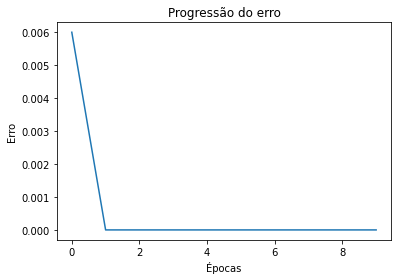

In [ ]:
#vizualizando o erro nas batch
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batch')
plt.ylabel('Erro')

Pelo gráfico podemos perceber que o modelo na Batch 200 ele meio estabiliza. Concluimos que não é necessário tantas épocas para se treinar o modelo nesta base de dados.

Leitura complementar: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/#:~:text=The%20batch%20size%20is%20a%20number%20of%20samples%20processed%20before,samples%20in%20the%20training%20dataset.


Em resumo: O tamanho de um lote deve ser maior ou igual a um e menor ou igual ao número de amostras no conjunto de dados de treinamento. Quanto ao número de épocas, você pode especificar um número a partir de um e ir testando. Esses são dois hiperparâmetros para os quais não existem uma regra, ou seja, você terá que testar esses parâmetros dentre outros critérios até encontrar o valor adequado que melhor se adapte ao seu problema.


###Salvando o modelo treinado

In [ ]:
modelo.to_disk('modelo')
#salvamos o modelo no caminho: /content/modelo/textcat/model
#todo o material dentro da parta modelo foi criado por nós, o que importa é o "model"

In [ ]:
#salvando no diretório desejado
modelo.to_disk('/content/drive/MyDrive/Curso_Twitter/Notbook/Datasets/modelo')

## 7: Testes do modelo

In [ ]:
#carregando o modelo
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [ ]:
#na nossa pasta
modelo_carregado = spacy.load('/content/drive/MyDrive/Curso_Twitter/Notbook/Datasets/modelo')
modelo_carregado

In [ ]:
#exemplo 1: testando um texto positivo
texto_positivo = 'eu adoro cor dos seus olhos'

In [ ]:
#tratando o texto novo
texto_positivo = preprocessamento3(texto_positivo)
texto_positivo

'adorar cor olho'

In [ ]:
#prevê
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [ ]:
#verificar a classificação
previsao.cats
#vamos buscar o indece de maior valor

{'ALEGRIA': 0.9976121187210083, 'MEDO': 0.0012470179935917258}

In [ ]:
#exemplo 2: testando um texto negativo
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento3(texto_negativo))
previsao.cats

{'ALEGRIA': 0.002561763860285282, 'MEDO': 0.9994090795516968}

Assim, podemos fazer vários teste... as vezes pode erra por conta da base de treino não está muito boa.

## 8: Avaliando o modelo

###Avaliando na base de treino

In [ ]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto) #vemos os textos
  previsao = modelo_carregado(texto) #predict do modelo nos textos treinados
  previsoes.append(previsao.cats) #pegar os valores de cada categoria

In [ ]:
#verificando o que ficou salvo na lista de previsões
previsoes

[{'ALEGRIA': 0.9999362230300903, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9995790123939514, 'MEDO': 0.00033009450999088585},
 {'ALEGRIA': 0.9998236298561096, 'MEDO': 0.00019169414008501917},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 6.356182711897418e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.999839186668396, 'MEDO': 6.752337503712624e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9997089505195618, 'MEDO': 0.00019392948888707906},
 {'ALEGRIA': 0.9998481273651123, 'MEDO': 0.00017897556244861335},
 {'ALEGRIA': 0.9998255372047424, 'MEDO': 0.00022473883291240782},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999178647994995, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9999136924743652, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9996377229690552, 'MEDO': 0.00018456955149304122},
 {'ALEGRIA': 0.99956

In [ ]:
#devemos deixa os resultados no formato da base de dados treinada
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final) #colocar no formato de arry para utilizar o sklearn
previsoes_final #ja no formato correto para cada uma das frases

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
#agora vamos buscar as respostas reais para comparar 
respostas_reais = base_dados['emocao'].values #no mesmo formato do sklearn
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

Devemos agora comprar o resultado do treino e o resultado real.

In [ ]:
#comparando o resultado de treino com real
from sklearn.metrics import confusion_matrix, accuracy_score #gerar a matriz e o acerto
accuracy_score(respostas_reais, previsoes_final) #trazer o percentual de acertos

#o que temos?

1.0

In [ ]:
#nossa matrix
cm = confusion_matrix(respostas_reais, previsoes_final) 
cm

array([[112,   0],
       [  0,  84]])

###Avaliando na base de teste

In [ ]:
#vamos testar na base de teste
base_dados_teste = pd.read_csv('/content/drive/MyDrive/Curso_Twitter/Notbook/Datasets/base_teste.txt', encoding = 'utf-8')

In [ ]:
#base de teste
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [ ]:
#tratando o texto do teste
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento3)

In [ ]:
#verificando
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [ ]:
#pegando as previsões
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
#previsões
previsoes

[{'ALEGRIA': 0.705095112323761, 'MEDO': 0.11901544034481049},
 {'ALEGRIA': 0.48987048864364624, 'MEDO': 0.7604499459266663},
 {'ALEGRIA': 0.8167107701301575, 'MEDO': 0.11771203577518463},
 {'ALEGRIA': 0.9999446868896484, 'MEDO': 0.00014384805399458855},
 {'ALEGRIA': 0.9826741814613342, 'MEDO': 0.008598320186138153},
 {'ALEGRIA': 0.004621709231287241, 'MEDO': 0.9993797540664673},
 {'ALEGRIA': 0.10323484987020493, 'MEDO': 0.939391553401947},
 {'ALEGRIA': 0.9804075360298157, 'MEDO': 0.01824088767170906},
 {'ALEGRIA': 0.9996004700660706, 'MEDO': 0.0010697065154090524},
 {'ALEGRIA': 0.9682257175445557, 'MEDO': 0.023655373603105545},
 {'ALEGRIA': 0.8397005200386047, 'MEDO': 0.09923752397298813},
 {'ALEGRIA': 0.09642082452774048, 'MEDO': 0.9137300848960876},
 {'ALEGRIA': 0.7147673964500427, 'MEDO': 0.5275363326072693},
 {'ALEGRIA': 0.999643087387085, 'MEDO': 0.0015425891615450382},
 {'ALEGRIA': 0.47469690442085266, 'MEDO': 0.727722704410553},
 {'ALEGRIA': 0.24778498709201813, 'MEDO': 0.950107

In [ ]:
#deixando a base no formato
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
#pegando as respotas reais do teste
respostas_reais = base_dados_teste['emocao'].values

In [ ]:
#precisão do teste
accuracy_score(respostas_reais, previsoes_final)

0.5238095238095238

In [ ]:
#matrix confusão
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[32, 16],
       [24, 12]])

Sugestões de melhoria:
- utilizar outros algoritmos
- melhorar a base de treino
- testar outras bases de treino